# College Major Analysis based on economical factors

## The goal of the analysis is to provide a data model that can help students and parents choose a college major and understand how big a financial difference it makes.

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [8]:
def load_data(filename):
    """Given a filename of a csv load data into a Pandas dataframe.

        filename - string

        return Pandas dataframe
    """
    return pd.read_csv(filename, encoding='utf-8')

**The dataset files used for this analysis are:**
1. all-ages.csv
2. majors-list.csv
3. women-stem.csv
4. recent-grads.csv
5. grad-students.csv

In [9]:
all_ages = 'all-ages.csv'
grad_students = 'grad-students.csv'
majors_list = 'majors-list.csv'
women_stem = 'women-stem.csv'
recent_grads = 'recent-grads.csv'

In [10]:
all_ages_df = load_data(all_ages)

all_ages_df.head(10)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.039230,52000,35000,75000.0
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.042563,58000,40500,80000.0


In [11]:
rows, cols = all_ages_df.shape

print("The number of rows:", rows)
print("The number of columns:", cols)

The number of rows: 173
The number of columns: 11


In [12]:
grad_students_df = load_data(grad_students)

grad_students_df.head(10)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154
5,3201,COURT REPORTING,Law & Public Policy,1542,22,1008,860,0,0.000000,75000.0,...,8921,6967,6063,518,0.069205,50000.0,34000,75000.0,0.147376,0.500000
6,6206,MARKETING AND MARKETING RESEARCH,Business,190996,3738,151570,123045,8324,0.052059,80000.0,...,1029181,817906,662346,45519,0.052719,60000.0,40000,91500.0,0.156531,0.333333
7,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,17488,386,13104,11207,473,0.034838,67000.0,...,89169,71781,61335,1869,0.025377,55000.0,38000,80000.0,0.163965,0.218182
8,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,5611,98,4716,3981,119,0.024612,85000.0,...,28314,22024,18381,2222,0.091644,60000.0,40000,85000.0,0.165394,0.416667
9,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,33928,688,28517,22523,899,0.030562,60000.0,...,163435,127832,100330,8706,0.063762,51000.0,37800,78000.0,0.171907,0.176471


### Analysis using a correlation matrix, which is a table showing correlation coefficients between variables.

In [13]:
# Plot Correlation matrix
def plot_CorrMatrix(df, graphWidth, csv_name):
    # dropping the columns with NaN or null values
    df = df.dropna('columns')
    
    # To store columns with more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    
    # If number of columns is less than 2
    if df.shape[1] < 2:
        print("Can't plot correlation matrix since number of columns is less than 2")
        return
    
    # df.corr() gets the pairwise correlation of all columns in the dataframe.
    corr = df.corr()
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    
    # matshow function is used to display an array as a matrix
    matShow = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(matShow)
    plt.title(f'Correlation Matrix for {csv_name}', fontsize=18)
    plt.show()

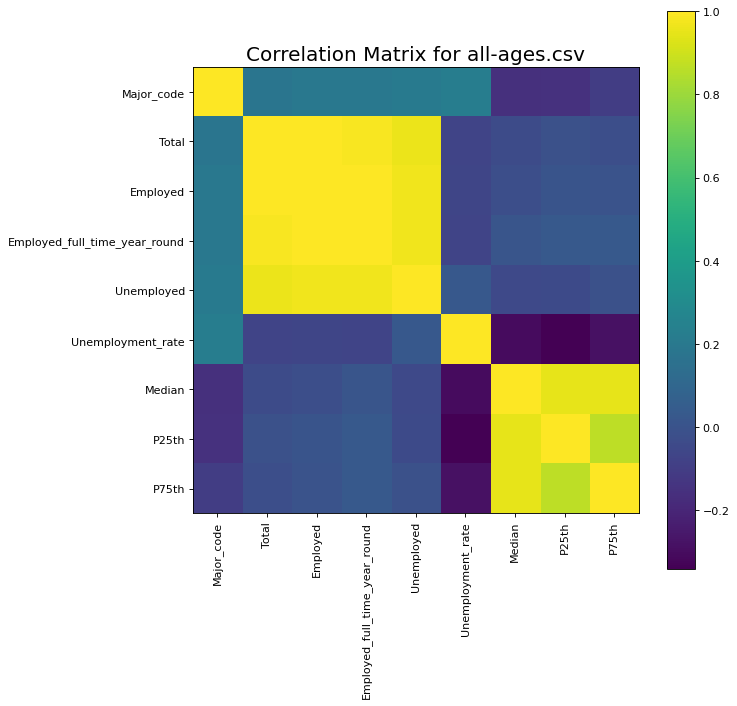

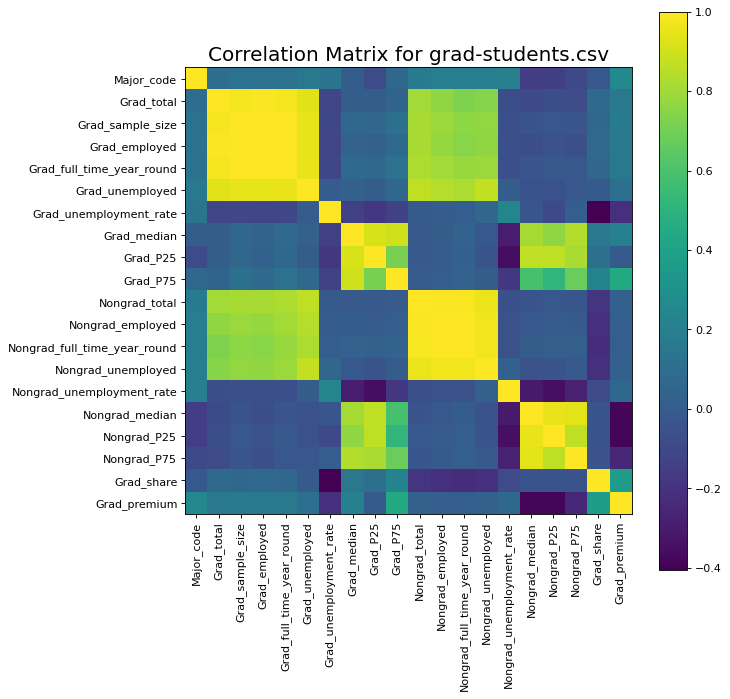

In [14]:
plot_CorrMatrix(all_ages_df, 9, all_ages)
plot_CorrMatrix(grad_students_df, 9, grad_students)